# PROJECT 1

Course: From Shallow To Deep Learning 

Author: Nicolas Arrieta Larraza

Date: 25-01-2021

## Initializating

### Import

In [1]:
%matplotlib inline
import os
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
import torchvision.datasets as datasets
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

### Configuration

In [2]:
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip uninstall -y opencv-python
!pip uninstall -y opencv-contrib-python
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

## Data exploration

Let's show the first image of our dataset to visualize what kind of content we are working with

2501
{'annotation': {'folder': 'VOC2007', 'filename': '000012.jpg', 'source': {'database': 'The VOC2007 Database', 'annotation': 'PASCAL VOC2007', 'image': 'flickr', 'flickrid': '207539885'}, 'owner': {'flickrid': 'KevBow', 'name': '?'}, 'size': {'width': '500', 'height': '333', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'car', 'pose': 'Rear', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '156', 'ymin': '97', 'xmax': '351', 'ymax': '270'}}]}}


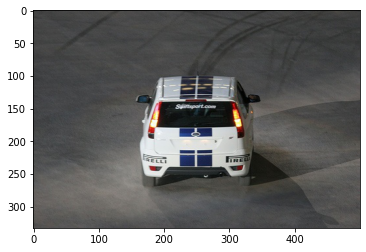

In [4]:
path = "/content/drive/MyDrive/UCA/FS2DL/Datasets/VOC2007"
os.chdir(path)
os.listdir(path)
voc_trainset = datasets.VOCDetection(path,year='2007', image_set='train', download=False)
print(len(voc_trainset))
image, annotation = voc_trainset[0][0],voc_trainset[0][1]
print(annotation)
show_image = np.array(image)
plt.imshow(show_image)
plt.show()

### SIFT

In this project we are going to test the SIFT algorithm on the dataset previously imported. As we learned in the lecture, the scale-invariant feature transform (SIFT) is a feature detection algorithm that provides keypoints of images by applying the Difference of Gaussians (DoG) and filtering low-contrast and edge keypoints.

In short, the algorithm provides n keypoints of images each of them represented by a keypoint descriptor of 128 values.

We are going to test this algorithm trough the openCV library.

## Computing keypoints and descriptors of images from the dataset

### Example 1

Let's take for the first example the image that we previously visualized and apply the SIFT algorithm on it. 

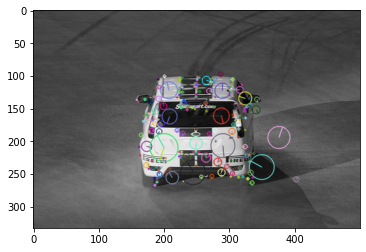

In [5]:
img = np.array(voc_trainset[0][0])
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('sift_keypoints.jpg',img)
plt.imshow(img)
plt.show()

Cheking the number of keypoints detected

In [6]:
print("Number of keypoints on image:",len(kp))

Number of keypoints on image: 244


Therefore our descriptor should be an array of 244 elements (Each keypoint) and each value should contain containing 128 values:

In [7]:
des = sift.compute(gray,kp)
print("Length of descriptor array:",len(des[1]))
print("Length of a descriptor element:",len(des[1][0]))

Length of descriptor array: 244
Length of a descriptor element: 128


### Example 2

Now, let's pick a different picture to test how SIFT works with a RGB image and this time trying the detectAndCompute() function.

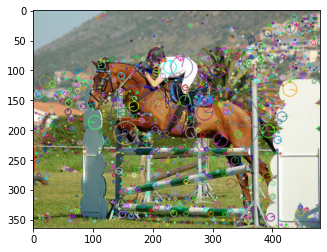

In [8]:
img = np.array(voc_trainset[1][0])
sift = cv.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(img,None)
img=cv.drawKeypoints(img,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('sift_keypoints.jpg',img)
plt.imshow(img)
plt.show()

In [9]:
print("Number of keypoints on image:",len(kp))
print("Length of descriptor array:",len(des))
print("Length of a descriptor element:",len(des[0]))

Number of keypoints on image: 1534
Length of descriptor array: 1534
Length of a descriptor element: 128


## Computing matching algorithm between pairs of images

### Example 1

Computing matching algorithm with different images, L2 norm ditance measurement and bf.match (Returns best match)

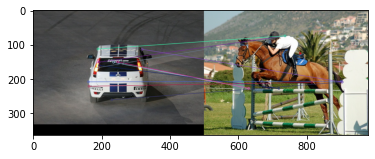

(<matplotlib.image.AxesImage at 0x7f7682f73d68>, None)

In [10]:
img1= np.array(voc_trainset[0][0])
img2 = np.array(voc_trainset[1][0])
sift = cv.xfeatures2d.SIFT_create()
sift = cv.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

bf = cv.BFMatcher(cv.NORM_L2, crossCheck=False)
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
plt.imshow(img3),plt.show()

### Example 2

Computing matching algorithm with same images, L2 norm ditance measurement and bf.knnMatch with k=2 (Returns k best matches)

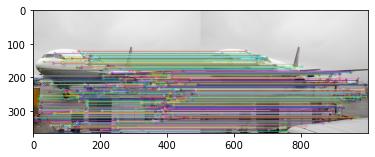

(<matplotlib.image.AxesImage at 0x7f7683080278>, None)

In [11]:
img1= np.array(voc_trainset[5][0])
img2 = np.array(voc_trainset[5][0])
sift = cv.xfeatures2d.SIFT_create()
sift = cv.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

bf = cv.BFMatcher(cv.NORM_L2, crossCheck=False)
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.imshow(img3),plt.show()




## Applying geometric transformations to images

Image to be transformed

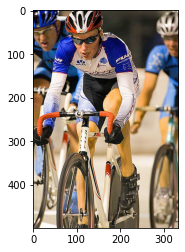

(<matplotlib.image.AxesImage at 0x7f76855c0e48>, None)

In [12]:
img = np.array(voc_trainset[2][0])
plt.imshow(img),plt.show()

### Scaling

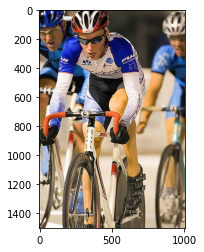

(<matplotlib.image.AxesImage at 0x7f7682ff1898>, None)

In [13]:
img_transf1 = cv.resize(img,None,fx=3, fy=3, interpolation = cv.INTER_CUBIC)
plt.imshow(img_transf1),plt.show()

### Translation

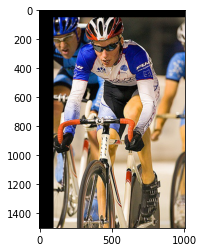

(<matplotlib.image.AxesImage at 0x7f7685595860>, None)

In [14]:
rows,cols = img_transf1.shape[:2]
M = np.float32([[1,0,100],[0,1,50]])
img_transf2 = cv.warpAffine(img_transf1,M,(cols,rows))
plt.imshow(img_transf2),plt.show()

### Rotation

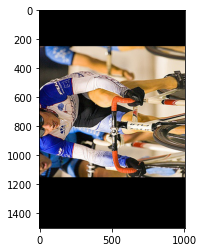

(<matplotlib.image.AxesImage at 0x7f7682ec74e0>, None)

In [15]:
rows,cols = img_transf2.shape[:2]
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
img_transf3 = cv.warpAffine(img_transf2,M,(cols,rows))
plt.imshow(img_transf3),plt.show()

## Retrieving original image from its transformed version

In [16]:
def find_image(n_imgs_dataset, transf_img):
  n_imgs=0
  best_distance = 1000000
  best_kp = []
  best_img = transf_img
  best_matches = []

  for i in voc_trainset:
      #Returns best result after comparing transformed image with n images from the Dataset
      if(n_imgs==n_imgs_dataset):
        img_match = cv.drawMatchesKnn(transf_img,kp1,best_img,best_kp,good,None,flags=2)
        plt.imshow(img_match),plt.show()
        break

      img = np.array(i[0])
      sift = cv.xfeatures2d.SIFT_create()
      kp1, des1 = sift.detectAndCompute(transf_img,None)
      kp2, des2 = sift.detectAndCompute(img,None)

      # BFMatcher with default params
      bf = cv.BFMatcher()
      matches = bf.knnMatch(des1,des2, k=2)

      # Apply ratio test
      good = []
      for m,n in matches:
          if m.distance < 0.75*n.distance:
              good.append([m])

      sum_dist = 0
      #Average of distances
      for m in good:
        sum_dist += m[0].distance

      avg = sum_dist / len(good) 

      #Saves best match
      if(avg < best_distance):
        best_distance = avg
        best_kp = kp2
        best_img = img
        best_matches = good

      n_imgs+=1

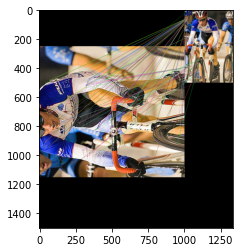

In [17]:
#We choose only 15 images of the dataset to reduce computing time
find_image(15, img_transf3)

## Forcing out the matching algorithm

Let's try to force the matching algorithm by transforming extremely an image

Original picture:

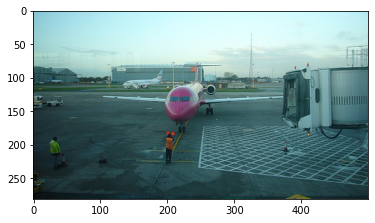

(<matplotlib.image.AxesImage at 0x7f7682cbbd68>, None)

In [18]:
img = np.array(voc_trainset[4][0])
plt.imshow(img),plt.show()

Image after various drastic transformations:

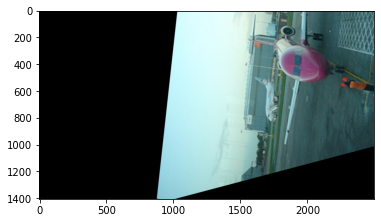

(<matplotlib.image.AxesImage at 0x7f7682da06a0>, None)

In [21]:
transf1 = cv.resize(img, None,fx=5, fy=5, interpolation = cv.INTER_LINEAR)

rows,cols = transf1.shape[:2]
M = np.float32([[1,0,100],[0,1,50]])
transf2 = cv.warpAffine(transf1,M,(cols,rows))

# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),60,1)
transf3 = cv.warpAffine(transf2,M,(cols,rows))

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
transf4 = cv.warpAffine(transf3,M,(cols,rows))

plt.imshow(transf4),plt.show()

Trying to find the image in the dataset

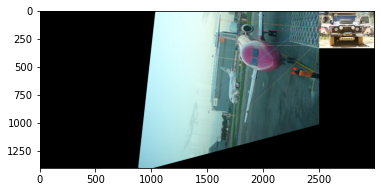

In [20]:
find_image(15, transf4)

As we can see we successfully forced the algorithm to commit a mistake. 

The transformations have changed sustantially the original image. Analyzing the result one may observe that the most important keypoints of the original image must be around the right part of the image. Since we remove that section, the keypoints of the rectangular shape objects (The hangar in the background) gain more importance and for that reason a match is found with the SUV.